['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']
After sample, the size is : 36
Before sample, the size is : 300
Size reduction ratio 88.00%


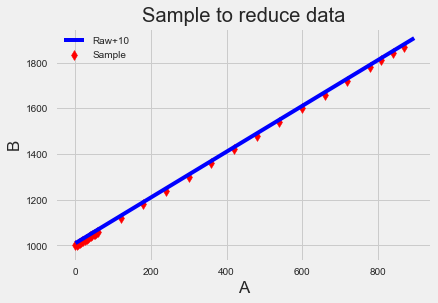

In [28]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
#plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.style.use('fivethirtyeight')
df=pd.DataFrame({"A":range(0,900,3),"B":range(1000,1900,3)})
df1=df.loc[(df.A <= 60) | ((df.A % 20==0) & (df.A<=800) & (df.A>60)) | ((df.A % 30==0) & (df.A<=1000) & (df.A>800))]
plt.plot(df.A,df.B+10,c='b')
plt.scatter(df1.A,df1.B,c='r',marker='d')
plt.legend([u"Raw+10",u"Sample"],loc='best')
#plt.ylim(1000,1030)
#plt.xlim(790,810)
plt.grid(True)
plt.xlabel("A")
plt.ylabel("B")
plt.title("Sample to reduce data")
print(plt.style.available)
print("After sample, the size is :",df1.shape[0])
print("Before sample, the size is :",df.shape[0])
print("Size reduction ratio {0:.2f}%".format((1-df1.shape[0]/df.shape[0])*100))

In [2]:
import matplotlib
print(matplotlib.matplotlib_fname())

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [12]:
int('99')

99

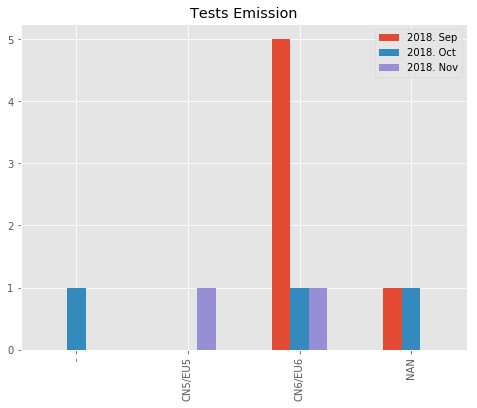

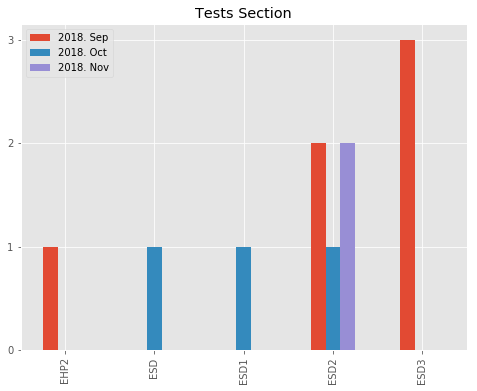

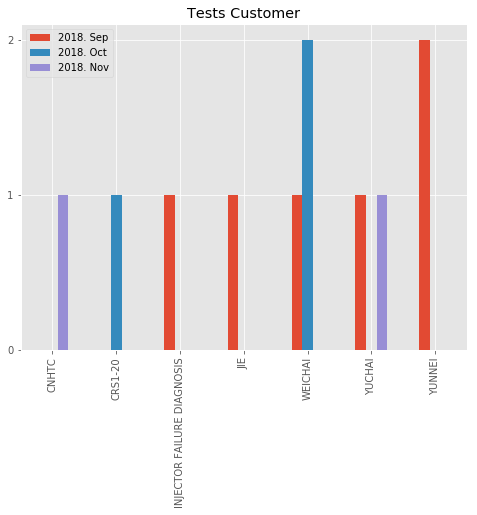

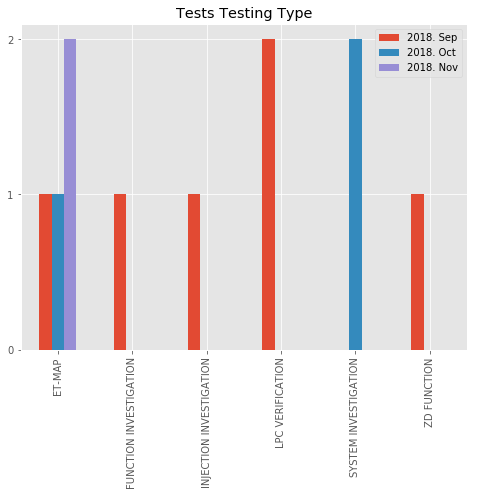

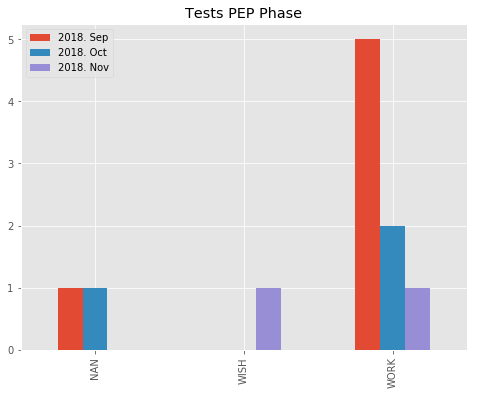

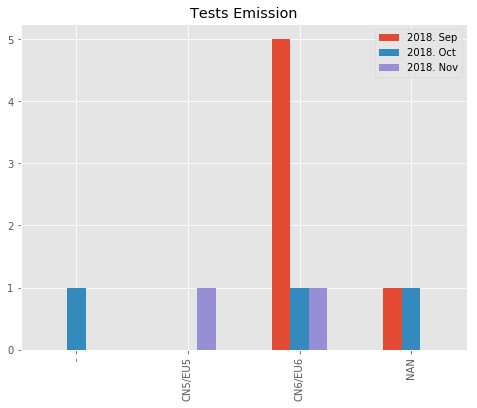

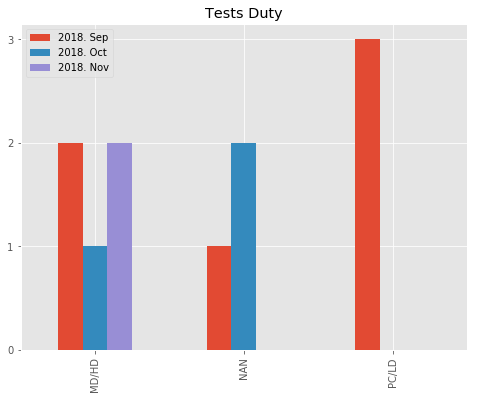

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
#df=pd.read_excel('C:/Users/taz3wx/Desktop/Customer Project Database_V2.6_2018 Jun~Sep.xlsm',sheet_name='Database',header=0,skiprows=1)
#df.save_csv('report.csv')


#fig, axes = plt.subplots(7,1,figsize=(10,60))
#id=0
#dfp=df.groupby('month')
#for i in pics:    
    #df[i].value_counts()[:10].plot(ax=axes[id],kind='bar',title=i)
    #df9[i].value_counts()[:10].plot(ax=axes[id],kind='bar')    
    #plt.show()
    #id+=1
#plt.show()

#ax=plt.figure()
#ax=df['month'].value_counts().sort_index().plot(kind='bar',figsize=(10,8),title='Tests distribution of 2018 ')

#df['month'].value_counts().sort_index().cumsum().plot(ax=ax,kind='line')
#df.groupby('month').apply().unstack(level=0).plot(kind='bar', subplots=True)
#display(df9)
#df
#df.dropna(axis=1,thresh=10)
#df.save_to_csv('report.csv')
#s=df['PEP Phase'].replace(to_replace={'PlAN': 'PLAN', 'Plan': 'PLAN','Work':'WORK'})
#s.value_counts().plot(kind='barh')


def month_str(month):
    return ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'][month-1]


class report:
    def __init__(self,year):
        df=pd.read_csv('report.csv')
        #df=df.select_dtypes(include=['float64'])
        df=df.filter(regex=r'^[^Unnamed]')
        df=df[df['Year']==year]
        plt.style.use('ggplot')
        df=df[df['Start Date']!='cancel']
        df['date'] = pd.to_datetime(df['Start Date'])
        df['month']=df['date'].dt.month
        self.df=df
        self.year=year
    def month_report(self,month,history=1):
        pics=['Emission','Section','Customer','Testing Type','PEP Phase','Emission','Duty']
        df=self.df
        year=self.year
        for type in pics:
            ax = plt.figure().gca()
            ax.yaxis.set_major_locator(MaxNLocator(integer=True))
            s=[]#hold all series for each month
            for i in range(month-history,month+1):
                if i>0:
                    se=df[df['month']==i][type].map(str_pro).value_counts()[:10]
                    se.name=str(year)+'. '+month_str(i)
                    s.append(se)
            pd.concat(s,axis=1).plot(ax=ax,kind='bar',title="Tests "+type,figsize=(8,6))
            plt.show()
    def year_report(self):
        pass
def str_pro(x):
    return str.upper(str.strip(str(x)));
r=report(2018)
r.month_report(11,2)

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


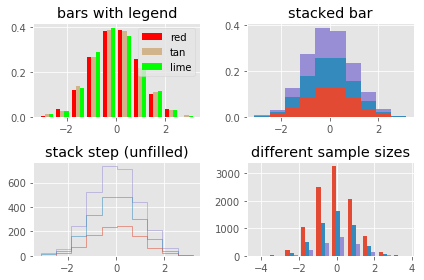

In [67]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, normed=1, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, normed=1, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

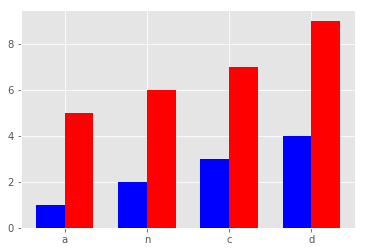

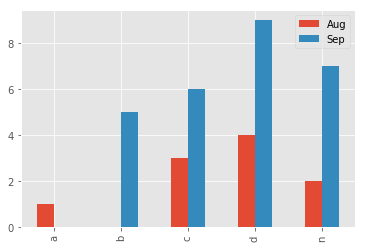

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
i=['a','n','c','d']
i1=['b','c','n','d']
a=pd.Series([1,2,3,4],index=i,name='Aug')
b=pd.Series([5,6,7,9],index=i1,name='Sep')
#id=set(a.extend(b))
ind = np.arange(len(a))
width=0.35
fig, ax = plt.subplots()
ax.bar(ind - width/2,a,width,label='8',color='b')
ax.bar(ind + width/2,b,width,label='9',color='red')
ax.set_xticks(ind)
ax.set_xticklabels(i)
plt.show()
i.extend(i1)
pd.concat([a,b],axis=1).plot(kind='bar')

before:2976
after:2920


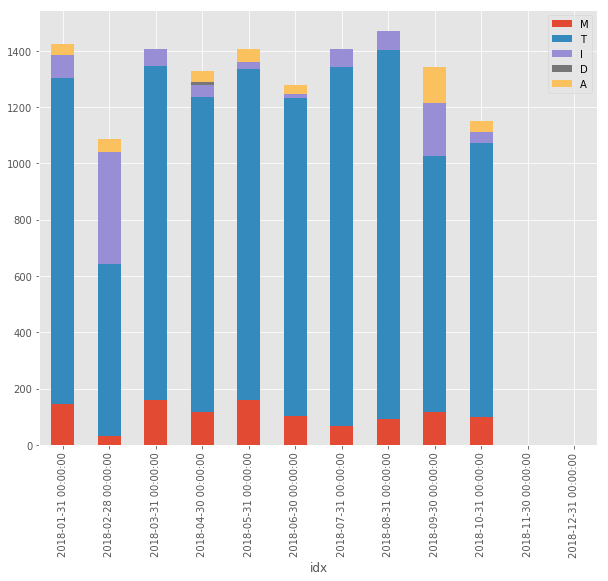

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E2EB295400>,
      dtype=object)

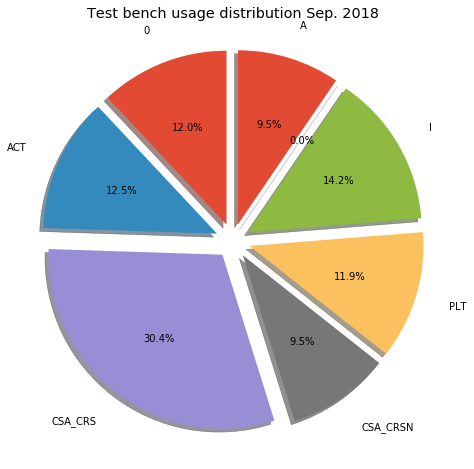

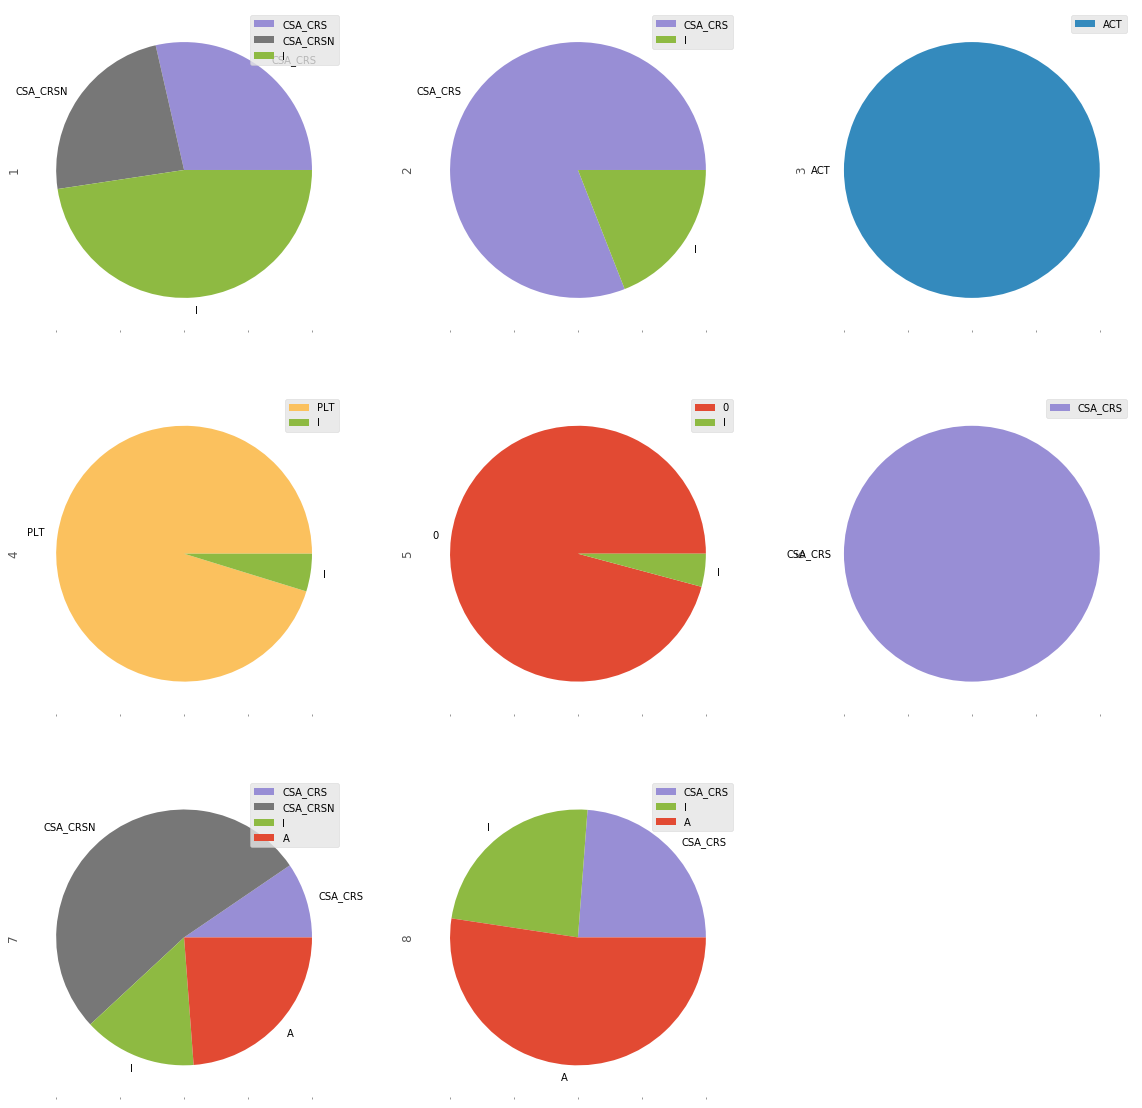

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
from datetime import datetime

def validate(date_text):
    try:
        if date_text != datetime.strptime(date_text, "%Y-%m-%d").strftime('%Y-%m-%d'):
            raise ValueError
        return True
    except ValueError:
        return False


fn=r'C:/Users/taz3wx/Desktop/Test Bench Maintenance_2018.xlsm'
df=pd.read_excel(fn,sheet_name='2018',header=0,skiprows=1)
df=df[df.Nr.str.startswith('TB').fillna(False)].drop(['Item','Comments'], 1).fillna(0)

c=["TBNO"]+['Cat',"M","T","I","D",'A']*31
df.columns=c


year=2018
cols=['Date','TB','CAT',"M","T","I","D",'A']
def conv(ser):
    tb=ser[0]
    return ser[1:].values.reshape(-1,6) #ser[1:].values.reshape(6,-1)
r=[]
month=1
date=1
for row in range(len(df)):
    #month=
    r.extend(conv(df.iloc[row,:]))
df=pd.DataFrame(r,columns=('Cat',"M","T","I","D",'A'))
#df['Date']=df.index%31+1
#df.Date.astype(int)
#df['Month']=np.floor(df.index/248).astype(int)+1

df['TB']=np.floor(df.index/31).astype(int) % 8 +1
#df.Month.astype(int)
df['idx']=df.index.map(lambda x: "{0}-{1:02d}-{2:02d}".format(2018,np.floor(x/248).astype(int)+1,x%31+1))#df['Month']+df['Date']
print('before:{}'.format(len(df)))
df=df[df.idx.map(validate)]
print('after:{}'.format(len(df)))
df.index=pd.DatetimeIndex(df['idx'])
df.drop(columns=['idx'],inplace=True)
df[list('MTIDA')].resample("M").sum().plot(kind='bar',stacked=True,figsize=(10,8))
plt.show()
d1=df['2018-9'].groupby(['Cat']).sum().fillna(0)#.plot(kind='pie',subplots=True,layout=(8,1),figsize=(100,100))
d1['v']=d1['M']+d1['T']
s1=d1['v']
l1=df['2018-9'].filter(["I","D","A"]).sum()
ch1=pd.concat([s1,l1])
explode = tuple([0.1]*len(ch1))  # only "explode" the 2nd slice (i.e. 'Hogs')
ch1.plot(kind='pie',autopct='%1.1f%%',
        shadow=True, startangle=90,figsize=(10,8), 
         labeldistance=1.2,
         explode=explode,
         label="",
         title="Test bench usage distribution Sep. 2018")

ida2=df['2018-9'].filter(list('IDA')+['TB']).groupby(['TB']).sum()#.plot()#.index.droplevel(1)
d2=df['2018-9'].filter(['Cat',"M","T"]+['TB']).groupby(['TB','Cat']).sum()#.plot()#.index.droplevel(1)
s2=d2['M']+d2['T']
pd.concat([s2.unstack(),ida2],axis=1).fillna(0).T.plot(kind='pie',subplots=True,layout=(3,3),figsize=(20,20))


In [3]:
import pandas as pd
df = pd.DataFrame([[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9],
                    [np.nan, np.nan, np.nan]],
columns=['A', 'B', 'C'])
df.agg(['sum', 'min'])

,A,B,C
sum,12.0,15.0,18.0
min,1.0,2.0,3.0
